In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline
plt.style.use("seaborn")
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
data = pd.read_csv("./datasets/Metro_time_series.csv")

In [4]:
LAST_DATE = '2006'
cols = ['Date', 'RegionName', 'ZHVI_AllHomes']
data = data[data['ZHVI_AllHomes'] > 0]
data = data.filter(cols)
data = data.rename(columns={"RegionName": "CBSA_Code"})

cityList = np.unique(data['CBSA_Code'])
metro = []
for code in tqdm(cityList):
    if min(data[data['CBSA_Code']  == str(code)].Date.values) <= LAST_DATE:
        metro.append(data[data['CBSA_Code']  == str(code)])
metro

100%|██████████| 730/730 [00:10<00:00, 66.49it/s]


[              Date CBSA_Code  ZHVI_AllHomes
 15439   1998-02-28     10140        80100.0
 16171   1998-03-31     10140        81100.0
 16903   1998-04-30     10140        83000.0
 17637   1998-05-31     10140        84500.0
 18371   1998-06-30     10140        85500.0
 ...            ...       ...            ...
 206628  2017-08-31     10140       147100.0
 207539  2017-09-30     10140       148800.0
 208450  2017-10-31     10140       150000.0
 209361  2017-11-30     10140       151400.0
 210272  2017-12-31     10140       153000.0
 
 [239 rows x 3 columns],               Date CBSA_Code  ZHVI_AllHomes
 1       1996-04-30     10220        28600.0
 685     1996-05-31     10220        28900.0
 1372    1996-06-30     10220        29100.0
 2060    1996-07-31     10220        29500.0
 2749    1996-08-31     10220        30300.0
 ...            ...       ...            ...
 206630  2017-08-31     10220       103800.0
 207541  2017-09-30     10220       104700.0
 208452  2017-10-31     10220

In [5]:
from sklearn.preprocessing import StandardScaler

def standardize(metro):
    scaler = StandardScaler()
    train = metro.ZHVI_AllHomes.values.reshape(-1, 1)
    return scaler.fit_transform(train)

for i in tqdm(metro):
    i['ZHVI_std'] = standardize(i) 

  0%|          | 0/653 [00:00<?, ?it/s]/Users/arunavgupta/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
100%|██████████| 653/653 [00:00<00:00, 1511.20it/s]


In [6]:
metro

[              Date CBSA_Code  ZHVI_AllHomes  ZHVI_std
 15439   1998-02-28     10140        80100.0 -1.632786
 16171   1998-03-31     10140        81100.0 -1.581558
 16903   1998-04-30     10140        83000.0 -1.484225
 17637   1998-05-31     10140        84500.0 -1.407382
 18371   1998-06-30     10140        85500.0 -1.356154
 ...            ...       ...            ...       ...
 206628  2017-08-31     10140       147100.0  1.799503
 207539  2017-09-30     10140       148800.0  1.886591
 208450  2017-10-31     10140       150000.0  1.948065
 209361  2017-11-30     10140       151400.0  2.019784
 210272  2017-12-31     10140       153000.0  2.101749
 
 [239 rows x 4 columns],               Date CBSA_Code  ZHVI_AllHomes  ZHVI_std
 1       1996-04-30     10220        28600.0 -2.398150
 685     1996-05-31     10220        28900.0 -2.379064
 1372    1996-06-30     10220        29100.0 -2.366340
 2060    1996-07-31     10220        29500.0 -2.340892
 2749    1996-08-31     10220        30

In [9]:
def movingAverage_normalize(a, n=5) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    moving_avg = ret[n - 1:] / n
    return np.array([(x-np.mean(moving_avg))/np.std(moving_avg) for x in moving_avg])
#fig, ax = plt.subplots()
#ax.scatter(pd.to_datetime(city1['Date'][4:]).dt.date, movingAverage_normalize(city1['ZHVI_AllHomes'].values))
#plt.show()
movingAverage_normalize(city1['ZHVI_AllHomes'].values)
# don't send moving average 
#  CHECK IF AFFECTS MOVING AVERAGE AFFECTS ARIMA

array([-1.52245317, -1.46376916, -1.41346858, -1.37993486, -1.36526386,
       -1.36631179, -1.37155143, -1.38517451, -1.41137273, -1.43547509,
       -1.44805023, -1.45957745, -1.46796088, -1.47424845, -1.48891945,
       -1.51826146, -1.55179518, -1.58847268, -1.61991055, -1.64610876,
       -1.67021113, -1.69221763, -1.70374485, -1.70164899, -1.68278627,
       -1.64925255, -1.60628747, -1.55913068, -1.51721353, -1.48787152,
       -1.46796088, -1.4470023 , -1.41870823, -1.37783901, -1.31810707,
       -1.24684791, -1.17768462, -1.11690475, -1.07079589, -1.03621424,
       -0.99744087, -0.94714029, -0.88950421, -0.8308202 , -0.78575927,
       -0.75956105, -0.74803383, -0.75012969, -0.76480069, -0.78156755,
       -0.78890305, -0.78995098, -0.79309477, -0.79099891, -0.78261548,
       -0.78156755, -0.78051962, -0.77108826, -0.76270484, -0.76165691,
       -0.76794448, -0.78051962, -0.79309477, -0.8088137 , -0.82138884,
       -0.8234847 , -0.82767642, -0.84549121, -0.86854564, -0.89

              Date CBSA_Code  ZHVI_AllHomes
316     1996-04-30     29420        85700.0
1002    1996-05-31     29420        85000.0
1689    1996-06-30     29420        84700.0
2378    1996-07-31     29420        84300.0
3067    1996-08-31     29420        84200.0
...            ...       ...            ...
207073  2017-08-31     29420       183800.0
207984  2017-09-30     29420       184500.0
208895  2017-10-31     29420       185500.0
209806  2017-11-30     29420       187300.0
210717  2017-12-31     29420       188900.0

[261 rows x 3 columns]


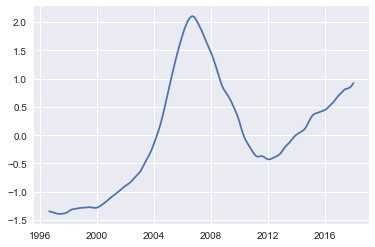

In [10]:
city1 = metro[0]
ames = data[data.CBSA_Code == '29420']
print(ames)
fig, ax = plt.subplots()
ax.plot(pd.to_datetime(ames['Date'][4:]).dt.date, movingAverage_normalize(ames['ZHVI_AllHomes'].values))
# ax.scatter(pd.to_datetime('2009-05-31'), ames[ames['Date'] == '2009-05-31']['ZHVI_AllHomes'])

In [11]:
THRESHOLD = 1

# def find_max_start(city):
#     return type == str

def find_start(city):
    """
    returns recession start date, measured as the largest local maximum ZHVI for a given city
    takes: city (pd.dataframe) [Date, ZHVI_avg_norm]
    returns: start_date (pd.datetime)
    """
    last_date = city.sort_values('Date', ascending=False).iloc[0]['Date']
    city = city[city['Date'] < '2015']
    d = lambda i: city['ZHVI_std'].iloc[i] - city['ZHVI_std'].iloc[i-1]
    diffs = np.array([d(i) for i in range(1, len(city))])
    # reshape dataframe to include diffs
    city = city.iloc[1:]
    city['Diffs'] = diffs
    # find local maxes using diffs
    is_max = np.array([(city['Diffs'].iloc[i] >= 0) 
                       and (city['Diffs'].iloc[i+1] <= 0) 
                       and (city['Diffs'].iloc[i+1] - city['Diffs'].iloc[i] <= THRESHOLD) for i in range(len(city) - 1)])
    is_max = np.append(is_max, False)

    # check for presence of local maxes at all
    if np.count_nonzero(is_max) == 0:
        return last_date
    # add 'is_maximum' truth column to dataframe
    city['Max'] = is_max
    # filter and find largest max
    theMax = city[city['Max'] == 1.0].sort_values("ZHVI_std", ascending=False).iloc[0]
    start_date = theMax['Date']
    return start_date

In [27]:
failed_cities = []
def ARIMA_50(city, start, params=(5,1,1)):
    """
    Params:
    city -- time-series dataframe object containing Date and ZHVI columns
    start -- datetime object from index of city representing peak ZHVI
    params -- p, d, and q parameters for ARIMA
    """
    
    #add start.dt.strftime('%Y-%m-%d') to convert datetime to string
    
    from statsmodels.tsa.arima_model import ARIMA
    
    before = city[['Date', 'ZHVI_std']]
#     print(before.shape, start)
    before = before[before['Date'] < start].set_index(['Date'])['ZHVI_std'].values
    steps = city.shape[0] - before.shape[0]
    try:
        model = ARIMA(before, order=(5, 1, 1))
        model_fit = model.fit(disp=0)
        return model_fit.forecast(steps)[0]
    except:
        failed_cities.append(np.unique(city.CBSA_Code)[0])
        return np.repeat(city[city['Date'] == start].ZHVI_AllHomes, steps)
    
def HWES(city, start):
    """
    Params:
    city -- time-series dataframe object containing Date and ZHVI columns
    start -- datetime object from index of city representing peak ZHVI
    params -- p, d, and q parameters for ARIMA
    """
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    
    train = city[['Date', 'ZHVI_std']]
#     print(before.shape, start)
    train = train[train['Date'] < start].set_index(['Date'])['ZHVI_std'].values
    steps = city.shape[0] - train.shape[0] - 1
    
    model = ExponentialSmoothing(train)
    model_fit = model.fit()
    yhat = model_fit.predict(len(train), len(train)+steps)
    return yhat

In [28]:
def find_end(city, start, forecast):
    """
    returns recession end date, measured as the first point of intersection between ZHVI and ARIMA_50 for a given city
    takes: city (pd.dataframe) [Date, ZHVI_avg_norm], ARIMA_50 (pd.dataframe) [Date, forecasted_ZHVI_norm] 
    returns: end_date (pd.datetime)
    """
    # calculate diffs
    recession_ZHVI = city[city['Date'] >= start]
    diffs = forecast - recession_ZHVI['ZHVI_std'].values
    city_resid = pd.DataFrame(data={'Date': recession_ZHVI['Date'].values, 'Delta': diffs})
    # filter only positive residuals, and most recent one is the last recession date
    most_recent_positive_delta = city_resid[city_resid['Delta'] > 0].sort_values("Date", ascending=False)
   # if ARIMA model indicates a sharp drop, set end date as one month after start date
    if (most_recent_positive_delta.shape[0] == 0):
        return city_resid.Date.values[0]
    end_date = most_recent_positive_delta['Date'].iloc[0]
#     print(end_date)
    return end_date

In [29]:
def calc_resid(city, predicted, start, end):
    """
    Params:
    city -- time-series dataframe object containing Date and ZHVI columns
    predicted -- predicted values from max to last date of city time-series
    max -- datetime object from index of city representing peak ZHVI
    end -- datetime object from index of city representing intersection of 
    actual and predicted ZHVI or last date of actual
    """
    
    # get indices of start and end date and use those to splice arrays
    recession_ZHVI = city[city['Date'] >= start]
    recession_ZHVI = recession_ZHVI[recession_ZHVI['Date'] < end]
    end_index = len(recession_ZHVI)
    predicted_to_end = predicted[:end_index]
    diffs = predicted_to_end - recession_ZHVI['ZHVI_std'].values
    return sum(diffs)

In [30]:
def find_AU3(metro):
#     print("City: {}".format(np.unique(metro.CBSA_Code)))
    start = find_start(metro)
    arima = ARIMA_50(metro, start)
    hwes = HWES(metro, start)
#     print("Start Date: ", start)
#     fig, ax = plt.subplots()
#     ax.plot(pd.to_datetime(metro['Date'][4:]).dt.date, movingAverage_normalize(metro['ZHVI_AllHomes'].values))
#     print(metro[metro['Date'] > start].shape)
    end = find_end(metro, start, hwes)
#     print("End Date: ", end)
    return calc_resid(metro, hwes, start, end)

In [31]:
AU3_output = list(map(find_AU3, tqdm(metro)))

  2%|▏         | 13/653 [00:04<03:25,  3.11it/s]/Users/arunavgupta/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:716: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/Users/arunavgupta/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/arunavgupta/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/arunavgupta/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/Users/arunavgupta/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:243:

IndexError: too many indices for array

In [21]:
failed_cities

['13940',
 '14780',
 '16180',
 '16260',
 '17200',
 '21740',
 '28780',
 '29420',
 '29500',
 '30060',
 '32860',
 '34140',
 '39500',
 '40180',
 '41760',
 '43940',
 '46860',
 '48460']

(17.988555616184318, -4.152091824283903)

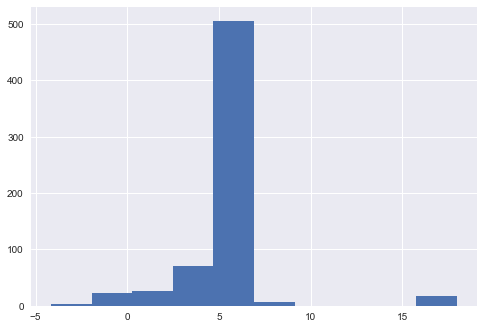

In [48]:
adjusted_outputs = [np.log(i) if i > 0 else i for i in np.abs(AU3_output)]
plt.hist(adjusted_outputs)
max(adjusted_outputs), min(adjusted_outputs)

In [49]:
cbsa_codes = [m['CBSA_Code'].iloc[0] for m in metro]

final_metro = pd.DataFrame(data={"CBSA_Codes": cbsa_codes, "AU3": adjusted_outputs})
final_metro.to_csv("AU3_results.csv")

In [50]:
final_metro.sort_values('AU3', ascending=True)

,CBSA_Codes,AU3
424,36420,-4.152092
222,23780,-3.721457
336,30700,-3.098149
427,36540,-2.414623
162,19780,-1.871264
...,...,...
114,17200,17.364266
519,41760,17.449039
77,14780,17.597436
605,46860,17.735015


In [26]:
final_metro.sort_values('AU3', ascending=False)

,CBSA_Codes,AU3
95,16180,17.988556
605,46860,17.735015
77,14780,17.597436
519,41760,17.449039
114,17200,17.364266
...,...,...
162,19780,-1.871264
427,36540,-2.414623
336,30700,-3.098149
222,23780,-3.721457


In [36]:
df = pd.DataFrame({"Date": [], "CBSA_Code": [], "ZHVI_AllHomes": [], "ZHVI_std": []})
for i in tqdm(metro):
    df = df.append(i)

100%|██████████| 653/653 [00:03<00:00, 198.30it/s]


In [37]:
df.to_csv("./datasets/normed_ZHVI.csv")

## Everything below this cell is experimental/debugging

In [ ]:
# RANDOM STUFF DELETE LATER

from statsmodels.tsa.arima_model import ARIMA
city1.tail()
before = city1[['Date', 'ZHVI_AllHomes']][city1['Date'] < '2017-08-31'].set_index(['Date'])['ZHVI_AllHomes']
model = ARIMA(endog=np.array(before, dtype=np.float), order=(5, 1, 1))
model_fit = model.fit(disp=0)
#np.array(before, dtype=np.float)[0]
#city1['dt'] = city1
#np.array(city1['Date'], dtype='datetime64')
model_fit.predict(before.shape[0], city1.shape[0])

In [ ]:
city1 = city1[city1['Date'] < "2012"]
d = lambda i: city1['ZHVI_AllHomes'].iloc[i] - city1['ZHVI_AllHomes'].iloc[i-1]
diffs = np.array([d(i) for i in range(1, len(city1))])
# reshape dataframe to include diffs
city1 = city1.iloc[1:]
city1['Diffs'] = diffs
city1['Diffs']
# find local maxes using diffs
is_max = np.array([(city1['Diffs'].iloc[i] >= 0) and (city1['Diffs'].iloc[i+1] <= 0) for i in range(len(city1) - 1)])
is_max = np.append(is_max, False)

# check for presence of local maxes at all
if np.count_nonzero(is_max) == 0:
    print(0)
# add 'is_maximum' truth column to dataframe
city1['Max'] = is_max
# filter and find largest max
theMax = city1[city1['Max'] == 1.0].sort_values("ZHVI_AllHomes", ascending=False).iloc[0]
start_date = theMax['Date']
start_date